In [10]:
with open('/home/jthybo/connect_wsl/data/SIDR_model_iter/number_1/2026-01-09_1000000__1.txt', 'r') as file:
    lines = file.readlines()

# print the 10th column of the first line
cols = lines[0].split()
print(cols[10] if len(cols) > 9 else "Line has fewer than 10 columns")

-2.994107e+00


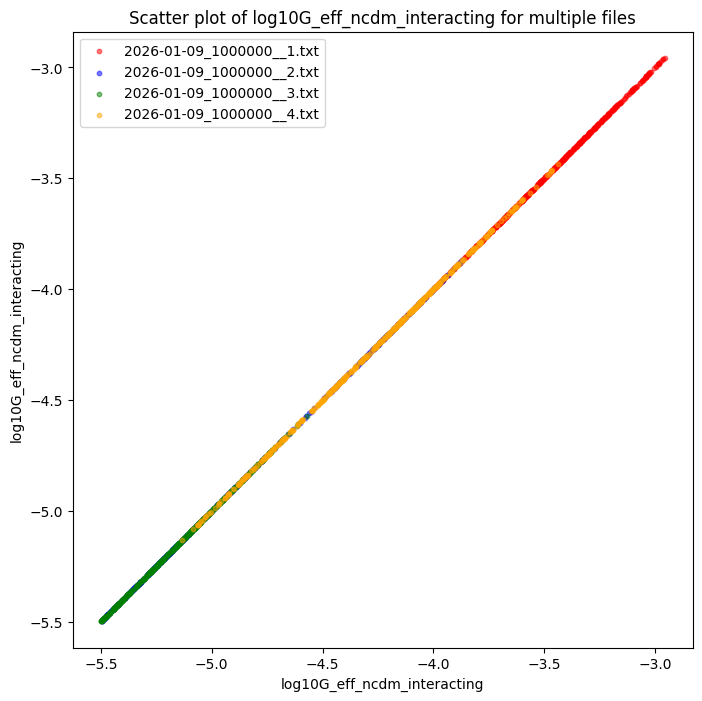

In [13]:
import matplotlib.pyplot as plt

# Folder containing the data files
folder = '/home/jthybo/connect_wsl/data/SIDR_model_iter/number_1'

# List of files to read
files = [
    '2026-01-09_1000000__1.txt',
    '2026-01-09_1000000__2.txt',
    '2026-01-09_1000000__3.txt',
    '2026-01-09_1000000__4.txt'
]

colors = ['red', 'blue', 'green', 'orange']
alpha = 0.5  # Transparency for overlapping points

plt.figure(figsize=(8, 8))  # Square figure for equal axes

for f, color in zip(files, colors):
    # Read file
    with open(f"{folder}/{f}", 'r') as file:
        lines = file.readlines()
    
    # Extract the 11th column (index 10) as float
    col10 = [float(line.split()[10]) for line in lines if len(line.split()) > 10]
    
    # Scatter plot: x vs x so same column on both axes
    plt.scatter(col10, col10, s=10, color=color, alpha=alpha, label=f)

plt.xlabel('log10G_eff_ncdm_interacting')
plt.ylabel('log10G_eff_ncdm_interacting')
plt.title('Scatter plot of log10G_eff_ncdm_interacting for multiple files')
plt.legend()
plt.axis('equal')  # Ensure equal scaling on both axes
plt.show()


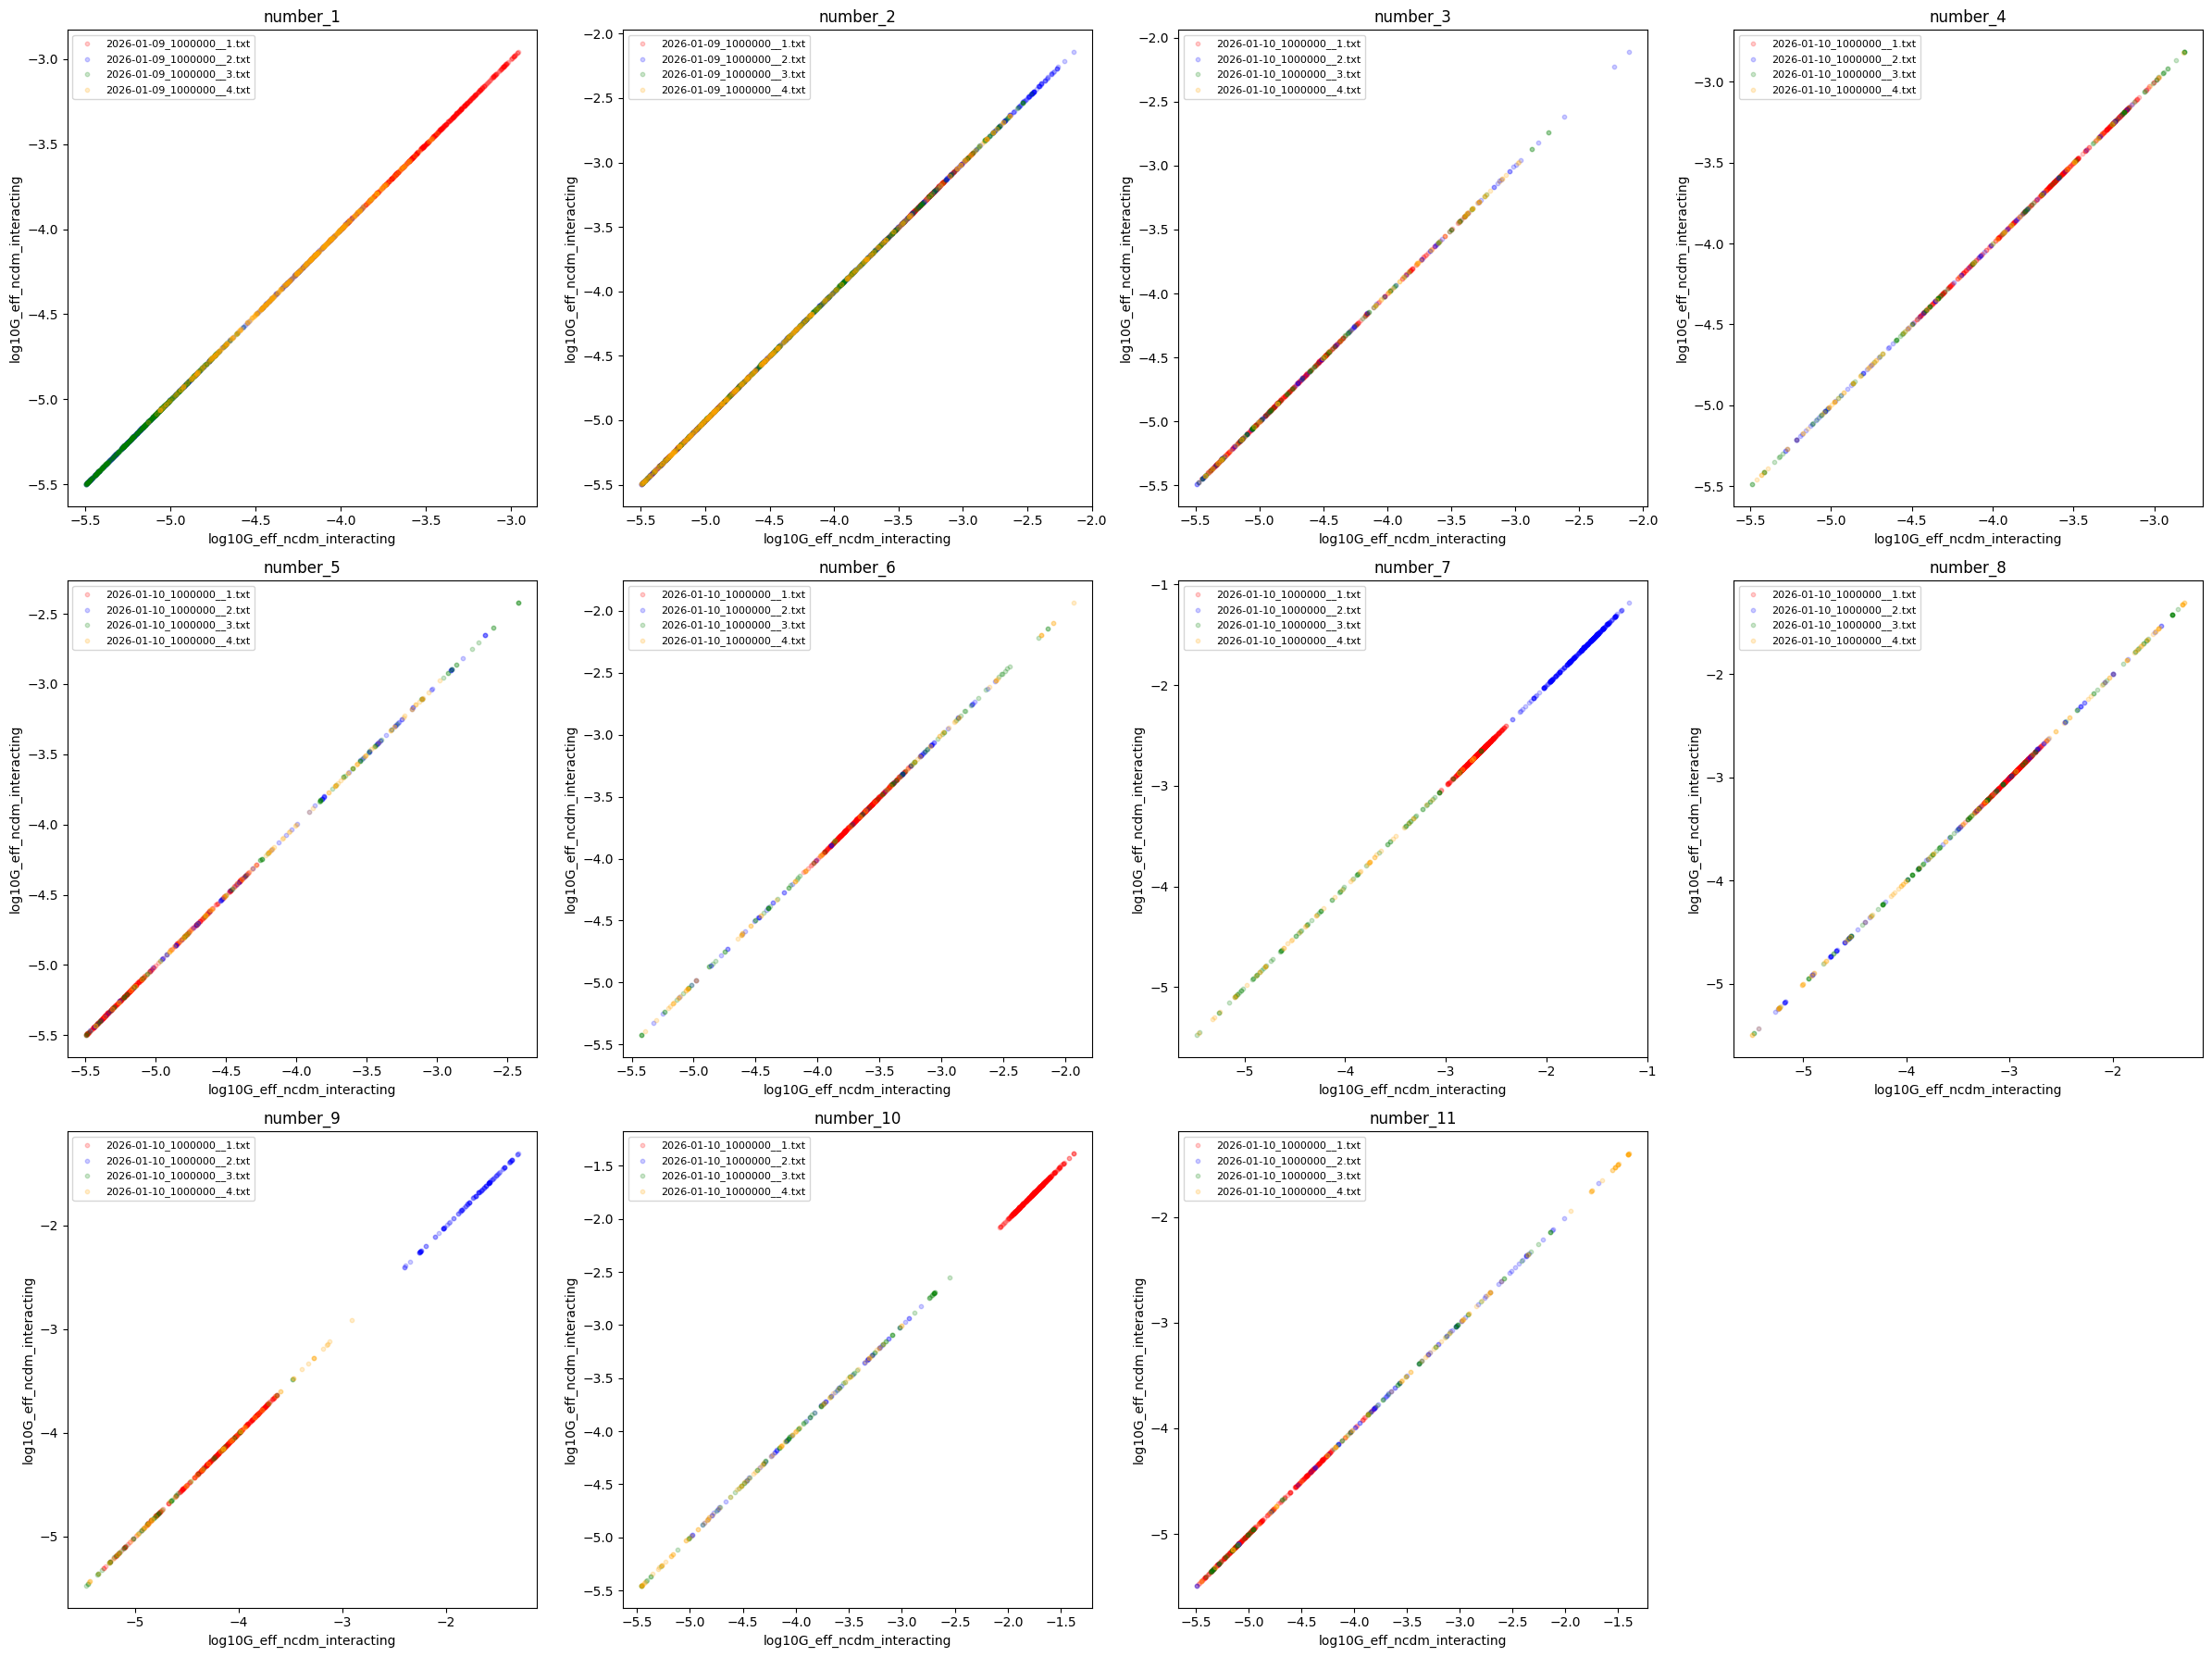

In [3]:
import matplotlib.pyplot as plt
import os
import glob
import re

# Base folder
base_folder = '/home/jthybo/connect_wsl/data/SIDR_model_iter/'

# Generate folders number_1 → number_11
folders = [f'number_{i}' for i in range(1, 12)]

# Colors for the __1..__4.txt files
colors = ['red', 'blue', 'green', 'orange']
alpha = 0.2

# Determine grid size: let's do 3 rows x 4 columns (12 slots) for 11 folders
fig, axes = plt.subplots(3, 4, figsize=(24, 18))
axes = axes.flatten()

for i, folder_name in enumerate(folders):
    folder_path = os.path.join(base_folder, folder_name)
    ax = axes[i]
    
    # Find all files matching *__?.txt or *__??.txt to capture __1..__10 if any
    files = glob.glob(os.path.join(folder_path, '*__*.txt'))
    
    # Sort files by the trailing number after __
    def sort_key(filename):
        match = re.search(r'__([0-9]+)\.txt$', filename)
        return int(match.group(1)) if match else 0
    
    files = sorted(files, key=sort_key)[:4]  # Take the first 4 in sorted order
    
    if not files:
        print(f"Warning: No matching files found in {folder_path}")
        continue
    
    for f, color in zip(files, colors):
        with open(f, 'r') as file:
            lines = file.readlines()
        
        # Extract the 11th column (index 10)
        col10 = [float(line.split()[10]) for line in lines if len(line.split()) > 10]
        
        # Scatter plot
        ax.scatter(col10, col10, s=10, color=color, alpha=alpha, label=os.path.basename(f))
    
    ax.set_title(folder_name)
    ax.set_xlabel('log10G_eff_ncdm_interacting')
    ax.set_ylabel('log10G_eff_ncdm_interacting')
    ax.axis('equal')
    ax.legend(fontsize=8)

# Remove empty subplot (12th slot) if any
for j in range(len(folders), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()
